In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
!pip install category_encoders
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cs =  pd.read_csv('gdrive/My Drive/Colab Notebooks/car_evaluation.csv')
cs.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
cs.shape

(1727, 7)

In [ ]:
col_rename = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
cs.columns = col_rename
cs.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [ ]:
cs.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
for col in col_rename:
  print(cs[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [ ]:
cs.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
x = cs.drop(['class'], axis = 1)

In [ ]:
y = cs['class']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.33 )

In [ ]:
x_test

,buying,maint,doors,persons,lug_boot,safety
185,vhigh,high,4,more,big,low
1447,low,high,3,4,big,high
769,high,low,2,4,med,high
1698,low,low,4,more,big,med
352,vhigh,low,3,2,small,high
...,...,...,...,...,...,...
743,high,med,5more,4,big,low
198,vhigh,high,5more,4,small,med
1006,med,high,3,2,big,high
1522,low,med,2,4,small,high


In [ ]:
y_train.shape, y_test.shape

((1157,), (570,))

In [ ]:
x_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [ ]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
292,vhigh,med,4,more,med,high
1349,low,vhigh,4,2,small,low
1109,med,med,3,2,med,low
996,med,high,2,more,big,med
259,vhigh,med,3,4,big,high


In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [ ]:
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)

In [ ]:
print(x_train)
print(x_test)

      buying  maint  doors  persons  lug_boot  safety
292        1      1      1        1         1       1
1349       2      2      1        2         2       2
1109       3      1      2        2         1       2
996        3      3      3        1         3       3
259        1      1      2        3         3       1
...      ...    ...    ...      ...       ...     ...
1108       3      1      2        2         2       1
1260       3      4      1        1         2       3
327        1      4      3        2         1       3
615        4      3      1        1         1       3
1230       3      4      2        3         3       3

[1157 rows x 6 columns]
      buying  maint  doors  persons  lug_boot  safety
185        1      1      1        1         1       1
1447       2      1      2        2         1       2
769        3      2      3        2         2       2
1698       2      2      1        1         1       3
352        1      2      2        3         3       2
...

In [ ]:
c_gini = DecisionTreeClassifier(criterion='gini' , max_depth=3 , random_state = 0)
c_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
pre_gini = c_gini.predict(x_test)
pre_gini

array(['acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'acc', 'acc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'un

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(format(accuracy_score(y_test, pre_gini)))

0.3719298245614035


In [ ]:
com_pre_gini = c_gini.predict(x_train)
com_pre_gini

array(['acc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [ ]:
print( format(accuracy_score(y_train, com_pre_gini)))

0.7692307692307693


[Text(0.5416666666666666, 0.875, 'X[5] <= 1.5\ngini = 0.463\nsamples = 1157\nvalue = [265, 48, 803, 41]'),
 Text(0.3333333333333333, 0.625, 'X[3] <= 2.5\ngini = 0.623\nsamples = 375\nvalue = [135, 18, 181, 41]'),
 Text(0.16666666666666666, 0.375, 'X[3] <= 1.5\ngini = 0.531\nsamples = 246\nvalue = [62, 8, 155, 21]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.645\nsamples = 123\nvalue = [62, 8, 32, 21]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 123\nvalue = [0, 0, 123, 0]'),
 Text(0.5, 0.375, 'X[0] <= 1.5\ngini = 0.609\nsamples = 129\nvalue = [73, 10, 26, 20]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.5\nsamples = 32\nvalue = [16, 0, 16, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.591\nsamples = 97\nvalue = [57, 10, 10, 20]'),
 Text(0.75, 0.625, 'X[5] <= 2.5\ngini = 0.338\nsamples = 782\nvalue = [130, 30, 622, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 384\nvalue = [0, 0, 384, 0]'),
 Text(0.8333333333333334, 0.375, 'X[3] <= 2.5\ngini = 0.53\nsamples = 398\n

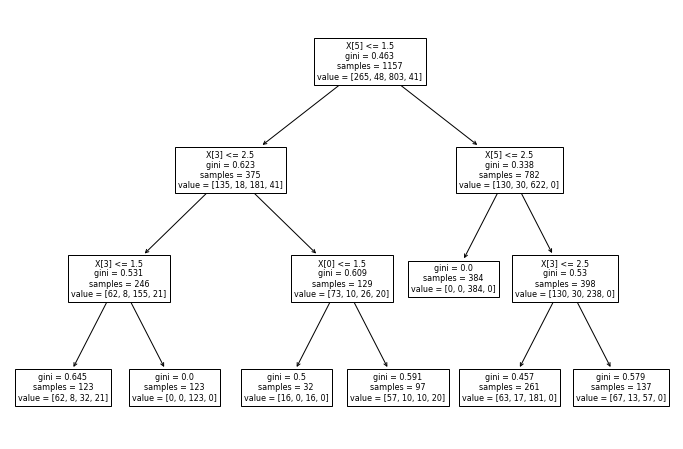

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(c_gini.fit(x_train, y_train)) 

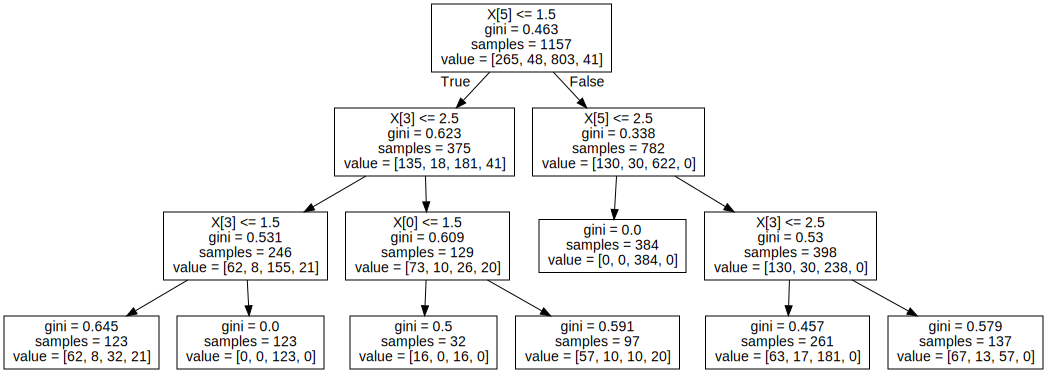

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(c_gini)

graph = graphviz.Source(dot_data) 

graph 

In [ ]:
en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
x_en = en.predict(x_test)

In [ ]:
print(format(accuracy_score(y_test , x_en)))

0.48596491228070177


In [ ]:
com_pre_en = en.predict(x_train)
com_pre_en


array(['acc', 'unacc', 'unacc', ..., 'unacc', 'acc', 'unacc'],
      dtype=object)

In [ ]:
print(format(accuracy_score(y_train , com_pre_en)))

0.7683664649956785


[Text(0.5416666666666666, 0.875, 'X[5] <= 1.5\nentropy = 1.214\nsamples = 1157\nvalue = [265, 48, 803, 41]'),
 Text(0.3333333333333333, 0.625, 'X[3] <= 2.5\nentropy = 1.597\nsamples = 375\nvalue = [135, 18, 181, 41]'),
 Text(0.16666666666666666, 0.375, 'X[3] <= 1.5\nentropy = 1.385\nsamples = 246\nvalue = [62, 8, 155, 21]'),
 Text(0.08333333333333333, 0.125, 'entropy = 1.695\nsamples = 123\nvalue = [62, 8, 32, 21]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 123\nvalue = [0, 0, 123, 0]'),
 Text(0.5, 0.375, 'X[0] <= 1.5\nentropy = 1.634\nsamples = 129\nvalue = [73, 10, 26, 20]'),
 Text(0.4166666666666667, 0.125, 'entropy = 1.0\nsamples = 32\nvalue = [16, 0, 16, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.596\nsamples = 97\nvalue = [57, 10, 10, 20]'),
 Text(0.75, 0.625, 'X[5] <= 2.5\nentropy = 0.873\nsamples = 782\nvalue = [130, 30, 622, 0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 384\nvalue = [0, 0, 384, 0]'),
 Text(0.8333333333333334, 0.375, 'X[3] <= 1.5

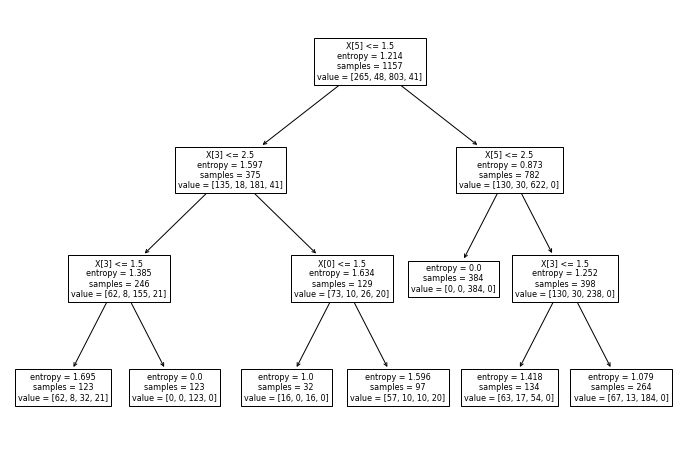

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(en.fit(x_train, y_train)) 

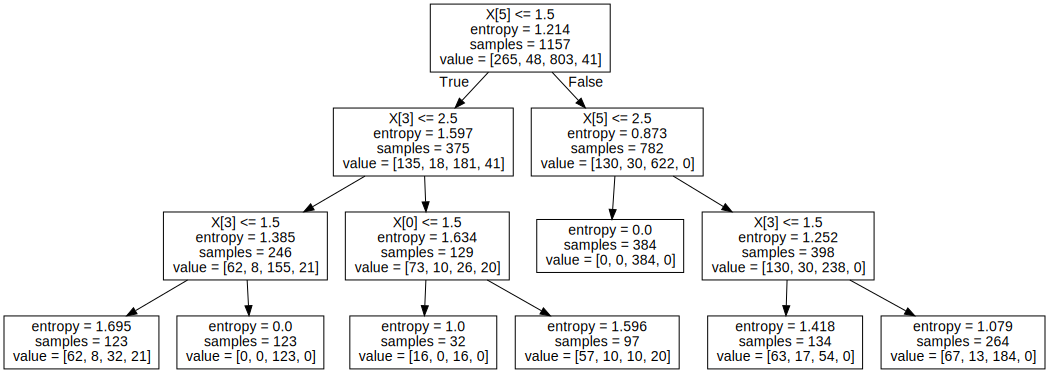

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(en )
graph = graphviz.Source(dot_data) 

graph 

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, x_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 27   0  92   0]
 [  4   0  17   0]
 [156   0 250   0]
 [  0   0  24   0]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, x_en))

              precision    recall  f1-score   support

         acc       0.14      0.23      0.18       119
        good       0.00      0.00      0.00        21
       unacc       0.65      0.62      0.63       406
       vgood       0.00      0.00      0.00        24

    accuracy                           0.49       570
   macro avg       0.20      0.21      0.20       570
weighted avg       0.50      0.49      0.49       570

